In [ ]:
import pandas as pd

df = pd.read_csv('../final_data/clean_model_data.csv')

df = df[['hhidpn','wave','nhmliv_self_next_wave','rablack','rahispan','rafemale']]

white_male = (df[(df['rablack']==0) & (df['rahispan']==0) & (df['rafemale']==0)]
    [['wave','nhmliv_self_next_wave']]
    .groupby('wave')
    .mean()
    .rename(columns={'nhmliv_self_next_wave':'white_male'}))

white_female = (df[(df['rablack']==0) & (df['rahispan']==0) & (df['rafemale']==1)]
    [['wave','nhmliv_self_next_wave']]
    .groupby('wave')
    .mean()
    .rename(columns={'nhmliv_self_next_wave':'white_female'}))

hispan_male = (df[(df['rablack']==0) & (df['rahispan']==1) & (df['rafemale']==0)]
    [['wave','nhmliv_self_next_wave']]
    .groupby('wave')
    .mean()
    .rename(columns={'nhmliv_self_next_wave':'hispanic_male'}))

hispan_female = (df[(df['rablack']==0) & (df['rahispan']==1) & (df['rafemale']==1)]
    [['wave','nhmliv_self_next_wave']]
    .groupby('wave')
    .mean()
    .rename(columns={'nhmliv_self_next_wave':'hispanic_female'}))
    
black_male = (df[(df['rablack']==1) & (df['rahispan']==0) & (df['rafemale']==0)]
    [['wave','nhmliv_self_next_wave']]
    .groupby('wave')
    .mean()
    .rename(columns={'nhmliv_self_next_wave':'black_male'}))

black_female = (df[(df['rablack']==1) & (df['rahispan']==0) & (df['rafemale']==1)]
    [['wave','nhmliv_self_next_wave']]
    .groupby('wave')
    .mean()
    .rename(columns={'nhmliv_self_next_wave':'black_female'}))

plot_df = white_male.join(white_female).join(hispan_male).join(hispan_female).join(black_male).join(black_female) * 100
plot_df.index = np.arange(1994,2020,2)

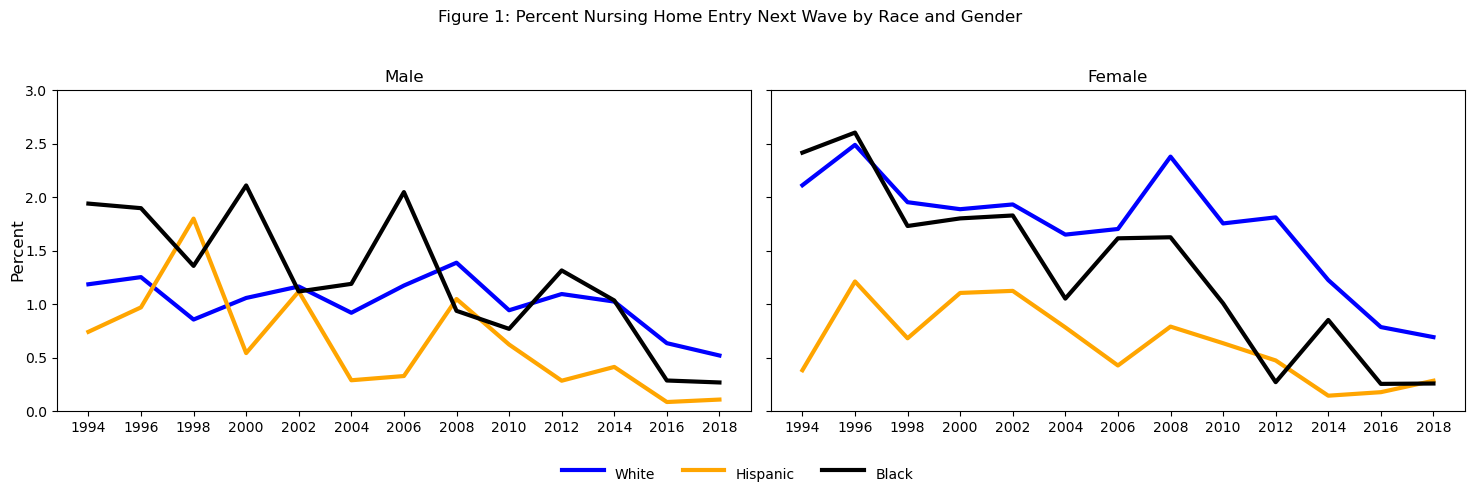

In [35]:
import matplotlib.pyplot as plt
import numpy as np

colors = {'white': 'blue', 'hispanic': 'orange', 'black': 'black'}
tick_years = list(range(1994, 2019, 2))

# Create a figure and axes for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot male series
ax1.plot(plot_df.index, plot_df['white_male'], color=colors['white'], label='White', linewidth=3)
ax1.plot(plot_df.index, plot_df['hispanic_male'], color=colors['hispanic'], label='Hispanic', linewidth=3)
ax1.plot(plot_df.index, plot_df['black_male'], color=colors['black'], label='Black', linewidth=3)
ax1.set_title('Male')
ax1.set_ylim(0, 3)
ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years)

# Plot female series
ax2.plot(plot_df.index, plot_df['white_female'], color=colors['white'], label='White', linewidth=3)
ax2.plot(plot_df.index, plot_df['hispanic_female'], color=colors['hispanic'], label='Hispanic', linewidth=3)
ax2.plot(plot_df.index, plot_df['black_female'], color=colors['black'], label='Black', linewidth=3)
ax2.set_title('Female')
ax2.set_ylim(0, 3)

ax2.set_xticks(tick_years)
ax2.set_xticklabels(tick_years)

fig.legend(labels=['White', 'Hispanic', 'Black'],
           loc='lower center',
           ncol=3,
           frameon=False,
           fontsize='medium',
           handlelength=3,  # Make the lines in the legend longer
           handleheight=3   # Increase line thickness in the legend
)
# Set common labels
fig.suptitle('Figure 1: Percent Nursing Home Entry Next Wave by Race and Gender')
fig.supylabel('Percent')

# Display the plot
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()